In [1]:
import os
import json

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# first part with least squares
from scipy.optimize import curve_fit

<ipython-input-131-82c91acddc1e>:8: RuntimeWarning: invalid value encountered in sqrt
  return 1e6* (6.2e10/ds/ds)*(  phi*np.exp(-1.025*ds*phi**.5)-(phi+v)*np.exp(-1.025*ds*(phi+v)**.5) )
<ipython-input-131-82c91acddc1e>:8: RuntimeWarning: invalid value encountered in sqrt
  return 1e6* (6.2e10/ds/ds)*(  phi*np.exp(-1.025*ds*phi**.5)-(phi+v)*np.exp(-1.025*ds*(phi+v)**.5) )


Whole Device Resistance (ohms)  phi=5.2 eV, k=3.6, gap=4nm, v=300mV
3.9267771056773116e+29
Edge resistance with Water undercut(ohms) 5nm undercut,  phi=5.2 eV, k=3.6, gap=4nm, v=300mV
1.2607895779310428e+34
Total Resistance with water undercut
3.926654808519452e+29
Current at 300mV = 7.64e-31
Current with undercut at 300mV = 7.64e-31


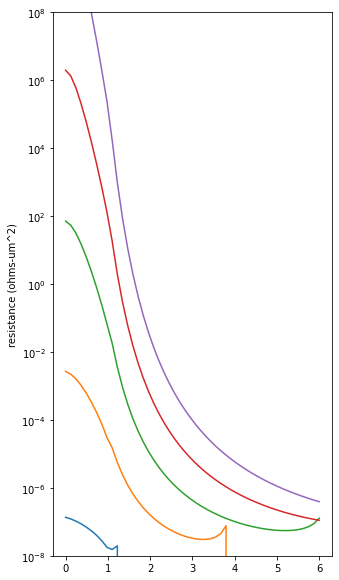

In [131]:
def I(v,S,phi0,K): #returns amps/m^2
    s1=6/K/phi0

    s2=np.where(v<phi0,S*(1-46/(3*phi0*K*S+20-2*v*K*S))+s1 ,(phi0*K*S-28)/K/v )
    ds=s2-s1
    phi=phi0-(v/2/S)*(s1+s2)-(5.75/K/(s2-s1))*np.log(s2/s1*(S-s1)/(S-s2))

    return 1e6* (6.2e10/ds/ds)*(  phi*np.exp(-1.025*ds*phi**.5)-(phi+v)*np.exp(-1.025*ds*(phi+v)**.5) )

S0 = [10,20,30,40,50]
phi00= 1
K0=6
R0=0
I0=0

v=np.linspace(.0001, 6, num=50)
plt.figure(figsize=[5,10])
for s in S0:
    R=v/I(v,s ,phi00 ,K0)
    plt.semilogy(v,R*1e6)
    plt.ylim([1e-8,1e8])    
    plt.ylabel("resistance (ohms-um^2)")

print("Whole Device Resistance (ohms)  phi=5.2 eV, k=3.6, gap=4nm, v=300mV")
rWhole=.3/(I(.3,40 ,4 ,3.4) * 1e-12)
print(rWhole) #resistance/um at 1 um^2  

print("Edge resistance with Water undercut(ohms) 5nm undercut,  phi=5.2 eV, k=3.6, gap=4nm, v=300mV")
rEdge=.3/(I(.3,40 ,4 ,80) * 5/1000*2* 1e-12)
print(rEdge) #resistance/um at 1 um^2  

rTotal = 1/(1/rWhole+1/rEdge)
print("Total Resistance with water undercut")
print(rTotal)

print("Current at 300mV = %.2e"%  (.3/rWhole)   )
print("Current with undercut at 300mV = %.2e"%  (.3/rTotal)   )

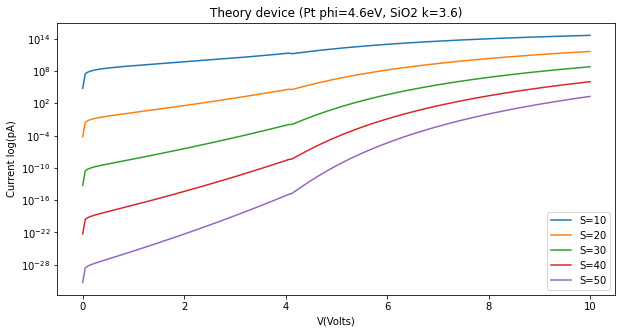

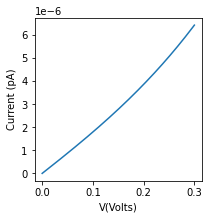

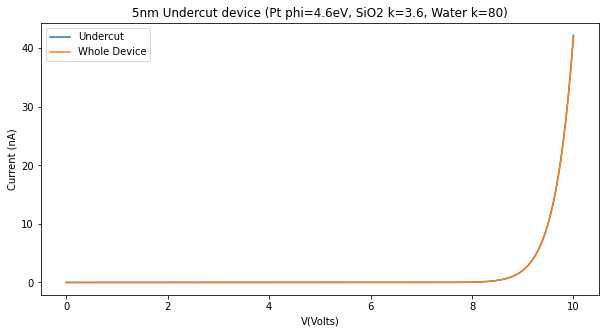

Total Resistance with water undercut
3.926654808519452e+29
Current at 300mV = 7.64e-31
Current with undercut at 300mV = 7.64e-31


In [119]:
def I(v,S,phi0,K): #returns amps/m^2
    s1=6/K/phi0

    s2=np.where(v<phi0,S*(1-46/(3*phi0*K*S+20-2*v*K*S))+s1 ,(phi0*K*S-28)/K/v )
    ds=s2-s1
    phi=phi0-(v/2/S)*(s1+s2)-(5.75/K/(s2-s1))*np.log(s2/s1*(S-s1)/(S-s2))
    #convert from A/cm^2 to A/m^2
    return 1e6* (6.2e10/ds/ds)*(  phi*np.exp(-1.025*ds*phi**.5)-(phi+v)*np.exp(-1.025*ds*(phi+v)**.5) )


S0 = [10,20,30,40,50]
phi00= 4.08
K0=3.6

v=np.linspace(.0001, 10, num=200)

plt.figure(figsize=[10,5])
plt.title("Theory device (Pt phi=4.6eV, SiO2 k=3.6)")
for s in S0:
    RDevice=I(v,s ,phi00 ,K0)*1e-12*1*1e12  #convert to A/um^2/area 1 um^2/convert to nA
    plt.semilogy(v,RDevice,label="S="+str(s))#
plt.xlabel("V(Volts)")
plt.ylabel("Current log(pA)")
plt.legend()
plt.show()

plt.figure(figsize=[3,3])
v=np.linspace(.0001, .3, num=200)
RDevice=I(v,25,phi00 ,K0)*1e-12*1*1e12  #convert to A/um^2/area 1 um^2/convert to nA
plt.plot(v,RDevice,label="S="+str(s))#
plt.xlabel("V(Volts)")
plt.ylabel("Current (pA)")
plt.show()

v=np.linspace(.0001, 10, num=200)
plt.figure(figsize=[10,5])
plt.title("5nm Undercut device (Pt phi=4.6eV, SiO2 k=3.6, Water k=80)")
S0=[45]
for s in S0:
    RDevice=v/(I(v,s ,phi00 ,K0)*  1e-6*1e-6)  #area 1 um^2        =>ohms
    RUnder=v/(I(v,s ,phi00 ,K0)* 1e-6*5e-9)    #area 1 um^2 by 5nm =>ohms
    RTotal = 1/(1/RDevice+1/RUnder)
    plt.plot(v,v/RTotal *1e9 ,label="Undercut") # convert to nA
    
    plt.plot(v,v/RDevice *1e9 ,label="Whole Device") # convert to nA
    
plt.xlabel("V(Volts)")
plt.ylabel("Current (nA)")
plt.legend()
plt.show()



rTotal = 1/(1/rWhole+1/rEdge)
print("Total Resistance with water undercut")
print(rTotal)

print("Current at 300mV = %.2e"%  (.3/rWhole)   )
print("Current with undercut at 300mV = %.2e"%  (.3/rTotal)   )


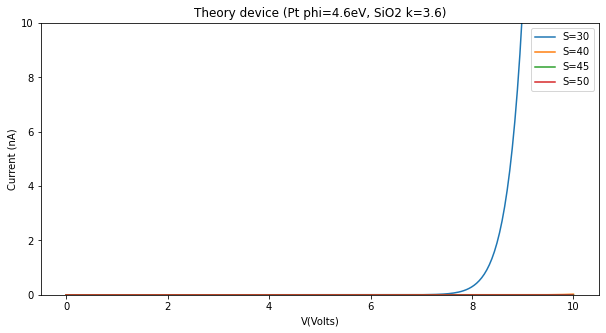

In [153]:
def I(v,S,phi0,K): #returns nA/um^2
    s1=6/K/phi0
    s2=np.where(v<phi0,S*(1-46/(3*phi0*K*S+20-2*v*K*S))+s1 ,(phi0*K*S-28)/K/v )
    ds=s2-s1
    phi=phi0-(v/2/S)*(s1+s2)-(5.75/K/(s2-s1))*np.log(s2/s1*(S-s1)/(S-s2))
    #convert from A/cm^2 to nA/um^2
    return 1e-6/1e-9* (6.2e10/ds/ds)*(  phi*np.exp(-1.025*ds*phi**.5)-(phi+v)*np.exp(-1.025*ds*(phi+v)**.5) )


S0 = [30,40,45,50]
phi00= 5.2
K0=3.6

v=np.linspace(.0001, 10, num=200)

plt.figure(figsize=[10,5])
plt.title("Theory device (Pt phi=4.6eV, SiO2 k=3.6)")
for s in S0:
    RDevice=I(v,s ,phi00 ,K0)  #convert to nA with 1um^2 junction
    plt.plot(v,RDevice,label="S="+str(s))#
plt.xlabel("V(Volts)")
plt.ylabel("Current (nA)")
plt.ylim([0,10])
plt.legend()
plt.show()
